In [2]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# result = Sampler("ibmq_qasm_simulator").run(circuits).result()

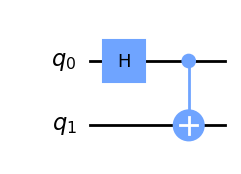

In [3]:
#Generate Bell state
bell = QuantumCircuit(2)

bell.h(0)
bell.cnot(0,1)

bell.draw()

In [4]:
from qiskit import Aer

# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')

job = backend.run(bell)
result = job.result()
outputstate = result.get_statevector(bell, decimals=3)
print(outputstate)

display(array_to_latex(outputstate))

Statevector([0.707+0.j, 0.   +0.j, 0.   +0.j, 0.707+0.j],
            dims=(2, 2))


<IPython.core.display.Latex object>

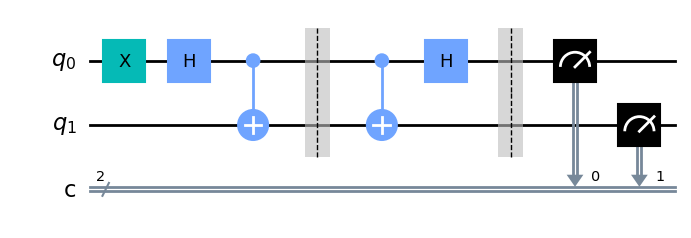

In [5]:
bell1 = QuantumCircuit(2,2)
#bell1.append(bell,[0,1])
#bell1.add_register(ClassicalRegister(2))
bell1.x(0)
bell1.h(0)
bell1.cnot(0,1)

bell1.barrier()

bell1.cnot(0,1)
bell1.h(0)

bell1.barrier()

bell1.measure(0,0)
bell1.measure(1,1)

bell1.draw()

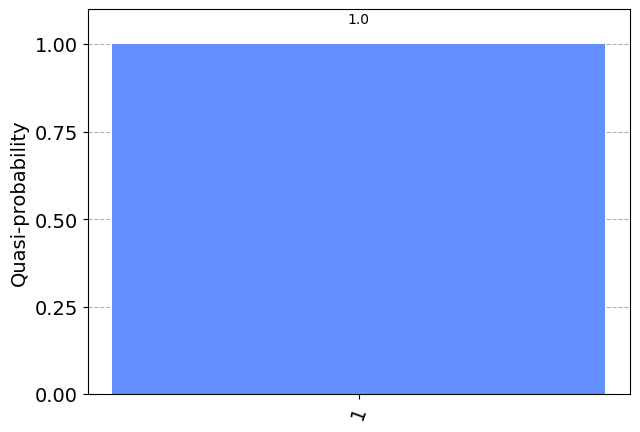

In [6]:
result = Sampler("ibmq_qasm_simulator").run(bell1).result()
plot_histogram(result.quasi_dists)

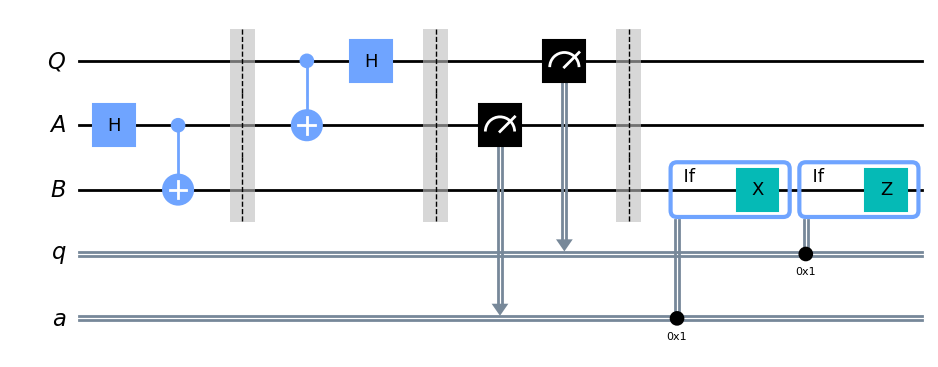

In [7]:
from qiskit import QuantumRegister, ClassicalRegister
#teleport
qubit = QuantumRegister(1, "Q")
ebit0 = QuantumRegister(1, "A")
ebit1 = QuantumRegister(1, "B")
q = ClassicalRegister(1, "q")
a = ClassicalRegister(1, "a")
b = ClassicalRegister(1,"b")

protocol = QuantumCircuit(qubit, ebit0, ebit1, q, a)

# Prepare ebit used for teleportation
protocol.h(ebit0)
protocol.cnot(ebit0, ebit1)
protocol.barrier()

# Alice's operations
protocol.cnot(qubit, ebit0)
protocol.h(qubit)
protocol.barrier()

# Alice measures and sends classical bits to Bob
protocol.measure(ebit0, a)
protocol.measure(qubit, q)
protocol.barrier()

# Bob uses the classical bits to conditionally apply gates
with protocol.if_test((a, 1)):
    protocol.x(ebit1)
with protocol.if_test((q, 1)):
    protocol.z(ebit1)

protocol.draw()

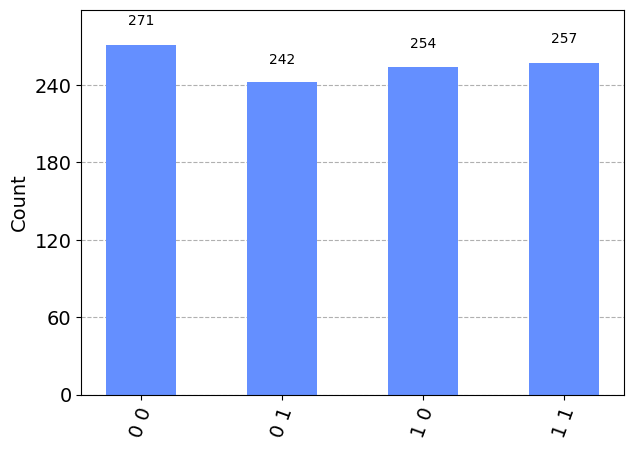

In [9]:
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

result = AerSimulator().run(protocol).result()
statistics = result.get_counts()
plot_histogram(statistics)

#note that we can see the measure statistics even with conditional gates in the circuit